In [1]:
# Import required packages

from pathlib import Path
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from tqdm import tqdm


# Packages related to NN Question
from dataclasses import dataclass
from typing import Tuple, Optional, Callable
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 1. Naive Bayes


In [2]:
# This is the helper function to load the dataset. PLEASE DO NOT CHANGE THIS.

# --- Dataset ---

rows = [
{"ID":1, "Age":"<=30", "Income":"Average", "Student":"No", "Credit":"Fair", "Buy":"No"},
{"ID":2, "Age":"<=30", "Income":"High", "Student":"Yes", "Credit":"Good", "Buy":"No"},
{"ID":3, "Age":"30-40", "Income":"High", "Student":"No", "Credit":"Fair", "Buy":"Yes"},
{"ID":4, "Age":">40", "Income":"Low", "Student":"No", "Credit":"Fair", "Buy":"Yes"},
{"ID":5, "Age":">40", "Income":"Low", "Student":"Yes", "Credit":"Good", "Buy":"Yes"},
{"ID":6, "Age":">40", "Income":"Average", "Student":"Yes", "Credit":"Good", "Buy":"No"},
{"ID":7, "Age":"30-40", "Income":"Low", "Student":"Yes", "Credit":"Good", "Buy":"Yes"},
{"ID":8, "Age":"<=30", "Income":"Average", "Student":"No", "Credit":"Fair", "Buy":"No"},
{"ID":9, "Age":"<=30", "Income":"Low", "Student":"No", "Credit":"Fair", "Buy":"Yes"},
{"ID":10,"Age":">40", "Income":"Average", "Student":"Yes", "Credit":"Fair", "Buy":"Yes"},
{"ID":11,"Age":"<=30", "Income":"Average", "Student":"Yes", "Credit":"Good", "Buy":"Yes"},
{"ID":12,"Age":"30-40", "Income":"High", "Student":"No", "Credit":"Good", "Buy":"Yes"},
{"ID":13,"Age":"30-40", "Income":"Average", "Student":"Yes", "Credit":"Fair", "Buy":"Yes"},
{"ID":14,"Age":">40", "Income":"Average", "Student":"No", "Credit":"Good", "Buy":"No"},
]

# We need to convert it to pandas dataframe format.
df = pd.DataFrame(rows)

In [3]:
# Please IMPLEMENT your code for the below function

def conditional_prob(df_class, feature, value, alpha):
    """
    Return P(feature = value | class)
    df_class: subset of dataframe for the class label
    feature: column name
    value: feature value to query
    alpha: laplace smoothing parameter

    """

In [4]:
# Your remaining code here

# 2. Decision Tree


In [6]:
# This is the helper function to load the dataset. PLEASE DO NOT CHANGE THIS.

# --- Dataset ---
rows = [
    {"ID":1, "Age":"<=30",   "Income":"Average",  "Student":"No",  "Credit":"Fair",  "Buy":"No"},
    {"ID":2, "Age":"<=30",   "Income":"High",     "Student":"Yes", "Credit":"Good",  "Buy":"No"},
    {"ID":3, "Age":"30-40",  "Income":"High",     "Student":"No",  "Credit":"Fair",  "Buy":"Yes"},
    {"ID":4, "Age":">40",    "Income":"Low",      "Student":"No",  "Credit":"Fair",  "Buy":"Yes"},
    {"ID":5, "Age":">40",    "Income":"Low",      "Student":"Yes", "Credit":"Good",  "Buy":"Yes"},
    {"ID":6, "Age":">40",    "Income":"Average",  "Student":"Yes", "Credit":"Good",  "Buy":"No"},
    {"ID":7, "Age":"30-40",  "Income":"Low",      "Student":"Yes", "Credit":"Good",  "Buy":"Yes"},
    {"ID":8, "Age":"<=30",   "Income":"Average",  "Student":"No",  "Credit":"Fair",  "Buy":"No"},
    {"ID":9, "Age":"<=30",   "Income":"Low",      "Student":"No",  "Credit":"Fair",  "Buy":"Yes"},
    {"ID":10,"Age":">40",    "Income":"Average",  "Student":"Yes", "Credit":"Fair",  "Buy":"Yes"},
    {"ID":11,"Age":"<=30",   "Income":"Average",  "Student":"Yes", "Credit":"Good",  "Buy":"Yes"},
    {"ID":12,"Age":"30-40",  "Income":"High",     "Student":"No",  "Credit":"Good",  "Buy":"Yes"},
    {"ID":13,"Age":"30-40",  "Income":"Average",  "Student":"Yes", "Credit":"Fair",  "Buy":"Yes"},
    {"ID":14,"Age":">40",    "Income":"Average",  "Student":"No",  "Credit":"Good",  "Buy":"No"},
]

df = pd.DataFrame(rows)

In [7]:
# Please IMPLEMENT your code for the below function
import math

def entropy(target_col):
    """Compute entropy of a pandas Series"""
    probs = target_col.value_counts(normalize=True)
    return -sum(p * math.log(p, 2) for p in probs if p > 0)


In [8]:
# Please IMPLEMENT your code for the below function

def info_gain(df, split_attr, target='Buy'):
    """Compute information gain of splitting df by split_attr"""
    base = entropy(df[target])
    n = len(df)
    remainder = sum(
        (len(sub)/n) * entropy(sub[target])
        for _, sub in df.groupby(split_attr)
    )
    return base - remainder

In [10]:
# Your remaining code here

# 2a
H = entropy(df['Buy'])
print("Entropy(Buy) =", round(H, 3))  

# 2b
ig_student = info_gain(df, 'Student', target='Buy')
print("IG(Student) =", round(ig_student, 3))   

# 2c 
subset_labels = df.loc[df['Age'] == '30-40', 'Buy'].unique()
print(subset_labels)           
print(len(subset_labels) == 1 and subset_labels[0] == 'Yes') 


Entropy(Buy) = 0.94
IG(Student) = 0.016
['Yes']
True


# 3. Netflix Recommender System

In [9]:
# This is the helper function to load the dataset. PLEASE DO NOT CHANGE THIS.

def load_ratings_data_pandas(data_dir="ml-latest-small/"):
    """Load data using pandas dataframes."""
    data_dir = Path(data_dir)
    assert data_dir.exists(), f"{data_dir} does not exist"

    return pd.read_csv(data_dir / 'ratings.csv',sep=',')


def load_movies_data_pandas(data_dir="ml-latest-small/"):
    """Load data using pandas dataframes."""
    data_dir = Path(data_dir)
    assert data_dir.exists(), f"{data_dir} does not exist"
    return pd.read_csv(data_dir / 'movies.csv')

def filter_data(ratings_data: pd.DataFrame, movies_data: pd.DataFrame):
    """Filter data. Too little ratings prevent effective use of matrix completion."""
    ratings_data = ratings_data.pivot(
        index='userId',
        columns='movieId',
        values='rating'
    ).fillna(0)

    keep_movie = (ratings_data != 0).sum(axis=0) > 100
    ratings_data = ratings_data.loc[:, keep_movie]

    # Filter movies_data by movieId (columns of ratings_data after filtering)
    movies_data = movies_data[movies_data['movieId'].isin(ratings_data.columns)]

    keep_user = (ratings_data != 0).sum(axis=1) >= 5
    ratings_data = ratings_data.loc[keep_user, :]

    return ratings_data, movies_data

def print_data_summary(ratings: pd.DataFrame):
    n_users = ratings.shape[0]
    n_movies = ratings.shape[1]
    n_ratings = (ratings != 0).sum().sum()
    density = n_ratings / (n_users * n_movies)

    print(f"Dataset Summary")
    print(f"----------------")
    print(f"Users: {n_users}")
    print(f"Movies: {n_movies}")
    print(f"Total Ratings: {n_ratings}")
    print(f"Data Density: {density:.4f} (fraction of observed ratings)")

def load_data_pandas(data_dir="ml-latest-small/", print_summary=False):
    """Load data in pandas format."""
    ratings, movies = filter_data(
        load_ratings_data_pandas(data_dir=data_dir),
        load_movies_data_pandas(data_dir=data_dir)
    )
    if print_summary:
        print_data_summary(ratings)
    return ratings, movies


def load_data(data_dir="ml-latest-small/", print_summary=False):
    """Load data in numpy format."""
    ratings, movies = load_data_pandas(data_dir=data_dir, print_summary=print_summary)
    return ratings.to_numpy(), movies.to_numpy()

In [10]:
# Please IMPLEMENT your code for the below function and DONT forget to provide correct n_features (r),  t_max and lambda.
# You can use the same function for Question 3b to run the matrix completion algorithm with different lambda values.

def matrix_completion(D, n_features, n_movies, n_users, t_max, lambd):
    np.random.seed(0)
    X = np.random.normal(size=(n_movies, n_features))
    Y = np.random.normal(size=(n_users, n_features))

    # Implementation the optimization procedure here
    for t in range(t_max):
        raise NotImplementedError

    return X, Y

In [11]:
ratings, movies = load_data("datasets/ml-latest-small", print_summary=True)
# YOUR CODE HERE

AssertionError: datasets/ml-latest-small does not exist

In [15]:
# Please IMPLEMENT your code for the below function to retrieve estimated ratings for the movies from the first user.
# You can use the same function for Question 3b to run the matrix completion algorithm
# with different lambda values and report the rating for the movie "Monty Python and the Holy Grail (1975)".

def get_predicted_ratings(titles, X, Y, ratings_df, movies_df, user=0):
    """
    Retrieve predicted ratings for a list of movie titles for a specified user.

    Args:
        titles (list of str): Movie titles to predict ratings for.
        X (np.ndarray): Movie feature matrix.
        Y (np.ndarray): User feature matrix.
        ratings_df (pd.DataFrame): Ratings matrix (users × movies).
        movies_df (pd.DataFrame): DataFrame with movieId and title.
        user (int, optional): User index. Defaults to 0.

    Returns:
        dict: Dictionary mapping movie titles to predicted ratings (float),
              or None if the movie is not available in the dataset.
    """
    # Your implementation starts here

# 4. PCA for Network Intrusion Detection

In [16]:
# This is the helper function for loading the kdd_balanced dataset. PLEASE DO NOT CHANGE the below code.
# This code will load the balanced kdd dataset. In the original version the number of intrusion samples are much more than normal samples.
# In this balanced version we have 100 intrusion samples, and 97,278 normal samples.

def load_kdd_data(data_dir="./datasets/kdd_balanced"):
    """
    Load the balanced dataset from Parquet format (ultra-fast loading).

    Returns:
        D_balanced: Feature matrix (numpy array)
        is_normal_balanced: Boolean labels (numpy array)
        original_indices: Original indices from full dataset (numpy array)
        df_balanced: Original dataframe subset (if available)
        metadata: Dataset metadata
    """

    data_path = Path(data_dir)

    # Check if required files exist
    required_files = ["balanced_dataset.parquet", "metadata.json"]
    missing_files = [f for f in required_files if not (data_path / f).exists()]
    if missing_files:
        raise FileNotFoundError(f"Required files not found in {data_path}: {missing_files}")

    # Load main dataset (this is very fast with Parquet)
    df_main = pd.read_parquet(data_path / "balanced_dataset.parquet")

    # Extract components
    feature_cols = [col for col in df_main.columns if col.startswith('feature_')]
    D_balanced = df_main[feature_cols].values
    is_normal_balanced = df_main['is_normal'].values
    original_indices = df_main['original_index'].values

    # Load original dataframe if available
    df_balanced = None
    if (data_path / "original_data_balanced.parquet").exists():
        df_balanced = pd.read_parquet(data_path / "original_data_balanced.parquet")

    # Load metadata
    with open(data_path / "metadata.json", 'r') as f:
        metadata = json.load(f)

    print(f"Balanced dataset loaded from {data_path} (Parquet format)")
    print(f"  Features: {D_balanced.shape}")
    print(f"  Normal: {metadata['n_normal']:,}, Intrusion: {metadata['n_intrusion']:,}")

    return D_balanced, is_normal_balanced, original_indices, df_balanced, metadata


In [17]:
# Implement your code here.

def compute_pca_from_intrusion_data(D_intrusion, r):
    """
    Compute PCA using SVD on intrusion data with rank r.

    Key insight: We train PCA on INTRUSION data, so normal data
    will have higher reconstruction error in this learned space.

    Returns:
        X: Principal components (learned from intrusion data)
        mu_intrusion: Mean vector of intrusion data
    """


In [18]:
# Implement your code here.

def project_to_low_dimensional_space(D, X, mu_intrusion):
    """
    Project any data points into the low-dimensional space defined by
    intrusion-trained PCA components.
    """

In [19]:
# Implement your code here.

def reconstruct_from_low_dimensional(Y, X, mu_intrusion):
    """Reconstruct data points from low-dimensional coordinates."""

In [20]:
# Implement your code here.

def compute_reconstruction_error(original, reconstructed):
    """Compute L2 reconstruction error."""

In [21]:
D_balanced, is_normal_balanced, original_indices, _, metadata = load_kdd_data()

# Your code here

FileNotFoundError: Required files not found in datasets/kdd_balanced: ['balanced_dataset.parquet', 'metadata.json']

# 5. K-means Initialization

In [22]:
# This is the helper function for loading the dataset. Please DO NOT CHANGE the below code.

RANDOM_SEED = 42

def load_iris_data(path=Path("datasets/iris/iris.csv")):
    df = pd.read_csv(path)
    data = df.iloc[:, :-1].values
    labels = df['target'].values
    return data, labels

def print_iris_info(data, labels):
    n_samples, n_features = data.shape
    n_classes = len(np.unique(labels))
    feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']

    print(f"Number of samples: {n_samples}")
    print(f"Number of features: {n_features}")
    print(f"Number of classes: {n_classes}")
    print(f"Feature names: {feature_names}")
    print(f"Class distribution:")
    unique, counts = np.unique(labels, return_counts=True)
    for cls, count in zip(unique, counts):
        print(f"  Class {cls}: {count} samples")

In [23]:
# This is the K-means implementation from the lecture slides. PLEASE DO NOT CHANGE the code below.

def RSS(D,X,Y):
    return np.sum((D- Y@X.T)**2)

def getY(labels):
    Y = np.eye(max(labels)+1)[labels]
    return Y

def update_centroid(D,Y):
    cluster_sizes = np.diag(Y.T@Y).copy()
    cluster_sizes[cluster_sizes==0]=1
    return D.T@Y/cluster_sizes

def update_assignment(D,X):
    dist = np.sum((np.expand_dims(D,2) - X)**2,1)
    labels = np.argmin(dist,1)
    return getY(labels)

def kmeans(D,r, X_init, epsilon=0.00001, t_max=10000):
    X = X_init.copy()
    Y = update_assignment(D,X)
    rss_old = RSS(D,X,Y) +2*epsilon
    t=0

    #Looping as long as difference of objective function values is larger than epsilon
    while rss_old - RSS(D,X,Y) > epsilon and t < t_max-1:
        rss_old = RSS(D,X,Y)
        X = update_centroid(D,Y)
        Y = update_assignment(D,X)
        t+=1
    print(t,"iterations")
    return X,Y


In [12]:
# Please implement your code here.

def init_centroids_greedy_pp(D,r,l=10):
    '''
        :param r: (int) number of centroids (clusters)
        :param D: (np-array) the data matrix
        :param l: (int) number of centroid candidates in each step
        :return: (np-array) 'X' the selected centroids from the dataset
    '''
    rng =  np.random.default_rng(seed=RANDOM_SEED) # use this random generator to sample the candidates (sampling according to given probabilities can be done via rng.choice(..))
    n,d = D.shape

    # Your code here

    indexes = rng.integers(low=0, high=n, size=r)
    X = np.array(D[indexes,:]).T
    return X

In [13]:
data, labels = load_iris_data()

# Your code here

NameError: name 'load_iris_data' is not defined

# 6A. Image Classification With Neural Networks

In [2]:
# This is the helper class that consists of parameters for training and visualization.


@dataclass
class Config:
    """Configuration parameters for the model and training."""

    # Model architecture
    embedding_dim: int = 2
    num_classes: int = 10

    # Training hyperparameters
    learning_rate: float = 0.9
    momentum: float = 0.9
    weight_decay: float = 5e-4
    batch_size: int = 128
    epochs: int = 5
    dropout_rate_1: float = 0.9
    dropout_rate_2: float = 0.9

    # Visualization
    viz_samples: int = 100
    viz_zoom: float = 0.7
    grid_resolution: float = 0.1

    # Paths
    checkpoint_dir: Path = Path("checkpoint")
    model_filename: str = "embedding_model.pth"

    @property
    def device(self) -> str:
        """Get the appropriate device for computation."""
        return 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# This is the implementation of the model architecture.
# You DO NOT NEED TO CHANGE the code, you only need to print out the output shape.

class ResidualBlock(nn.Module):
    """
    Residual block with skip connections and grouped convolutions.

    Implements: output = input + F(input)
    where F is a residual function composed of BatchNorm→ReLU→Conv layers.
    """

    def __init__(self, in_channels: int, out_channels: int, kernel_size: int, groups: int = 1):
        super().__init__()

        groups = min(groups, min(in_channels, out_channels))

        # Main convolution pathway
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size,
                              padding="same", groups=groups)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size,
                              padding="same", groups=min(groups, out_channels))

        # Skip connection (identity or dimension adjustment)
        self.skip_connection = (
            nn.Identity() if in_channels == out_channels
            else nn.Conv2d(in_channels, out_channels, kernel_size=1, padding="same")
        )

        # Pre-activation normalization layers
        self.norm1 = nn.BatchNorm2d(in_channels)
        self.norm2 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass implementing residual connection."""
        identity = self.skip_connection(x)

        # Residual pathway: BatchNorm → ReLU → Conv → BatchNorm → ReLU → Conv
        out = self.conv1(self.relu(self.norm1(x)))
        out = self.conv2(self.relu(self.norm2(out)))

        return identity + out


class EmbeddingNetwork(nn.Module):
    """
    CNN that maps input images to low-dimensional embedding space.

    Uses global average pooling instead of flattening to reduce overfitting
    and make the model robust to different input sizes.
    """

    def __init__(self, embedding_dim: int, dropout_rate_1: float, dropout_rate_2: float):
        super().__init__()

        # Initial feature extraction
        self.initial_conv = nn.Conv2d(1, 32, kernel_size=5, padding="same")
        self.initial_norm = nn.BatchNorm2d(32)

        # First residual block set (32 channels, groups=2)
        self.res_block1 = ResidualBlock(32, 32, kernel_size=3, groups=2)
        self.res_block2 = ResidualBlock(32, 32, kernel_size=3, groups=2)

        # Spatial downsampling
        self.pool = nn.MaxPool2d(2)
        self.norm_after_pool = nn.BatchNorm2d(32)

        # Second residual block set (64 channels, groups=4)
        self.res_block3 = ResidualBlock(32, 64, kernel_size=3, groups=4)
        self.res_block4 = ResidualBlock(64, 64, kernel_size=3, groups=4)

        # Final processing
        self.final_norm = nn.BatchNorm1d(64)
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, embedding_dim)

        # Regularization
        self.dropout1 = nn.Dropout(dropout_rate_1)
        self.dropout2 = nn.Dropout(dropout_rate_2)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass mapping images to embedding space.

        Args:
            x: Input tensor of shape (batch_size, 1, 28, 28)

        Returns:
            Embedding tensor of shape (batch_size, embedding_dim)
        """
        out = F.relu(self.initial_norm(self.initial_conv(x)))

        # out.shape = ? (tensor shape 1)

        # First round of residual blocks
        out = self.res_block2(self.res_block1(out))

        # out.shape = ? (tensor shape 2)

        # Pooling
        out = self.norm_after_pool(self.pool(out))

        # out.shape = ? (tensor shape 3)

        # Second round of residual blocks
        out = self.res_block4(self.res_block3(out))

        # out.shape = ? (tensor shape 4)

        # Global average pooling
        out = torch.mean(out, dim=(-1, -2))
        out = self.final_norm(out)

        # out.shape = ? (tensor shape 5)

        # Map to embedding space
        out = self.dropout1(out)
        out = F.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)

        return out


class EmbeddingClassifier(nn.Module):
    """Complete model combining embedding network with classifier."""

    def __init__(self, embedding_dim: int, num_classes: int, config: Config):
        super().__init__()
        self.embedding_net = EmbeddingNetwork(
            embedding_dim, config.dropout_rate_1, config.dropout_rate_2
        )
        self.classifier = nn.Linear(embedding_dim, num_classes, bias=True)

        nn.init.normal_(self.classifier.weight, 0, 0.01)
        nn.init.constant_(self.classifier.bias, 0)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass for training and evaluation."""
        embeddings = self.embedding_net(x)
        return self.classifier(embeddings)

    def get_embeddings(self, x: torch.Tensor) -> torch.Tensor:
        """Extract embeddings for visualization."""
        return self.embedding_net(x)

    def get_probabilities(self, x: torch.Tensor) -> torch.Tensor:
        """Get class probabilities for confidence visualization."""
        embeddings = self.embedding_net(x)
        return F.softmax(self.classifier(embeddings), dim=1)



In [4]:
# This is the helper code that downloads and calls the datasets and applies simple transformations.
# You DO NOT NEED to CHANGE anything.

def create_data_loaders(dataset_class, config: Config) -> Tuple[DataLoader, DataLoader]:
    """
    Create training and test data loaders.

    Args:
        dataset_class: torchvision dataset class (MNIST or FashionMNIST)
        config: Configuration object

    Returns:
        Tuple of (train_loader, test_loader)
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))  # MNIST standard values
    ])

    # Training data
    train_dataset = dataset_class(root='./data', train=True, download=True, transform=transform)
    if config.num_classes < 10:
        mask = train_dataset.targets < config.num_classes
        train_dataset.targets = train_dataset.targets[mask]
        train_dataset.data = train_dataset.data[mask]

    train_loader = DataLoader(
        train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=2
    )

    # Test data
    test_dataset = dataset_class(root='./data', train=False, download=True, transform=transform)
    if config.num_classes < 10:
        mask = test_dataset.targets < config.num_classes
        test_dataset.targets = test_dataset.targets[mask]
        test_dataset.data = test_dataset.data[mask]

    test_loader = DataLoader(
        test_dataset, batch_size=config.batch_size, shuffle=False, num_workers=2
    )

    return train_loader, test_loader

In [5]:
# This is the helper code for evaluating and calculating the metrics.
# You DO NOT NEED to CHANGE anything.

@dataclass
class EpochMetrics:
    """Container for epoch training/evaluation metrics."""
    accuracy: float
    avg_confidence: float
    avg_loss: float
    total_samples: int
    elapsed_time: Optional[float] = None


def compute_batch_metrics(logits: torch.Tensor, targets: torch.Tensor, loss: torch.Tensor) -> Tuple[int, float, int]:
    """
    Compute metrics for a single batch.

    Args:
        logits: Model output logits
        targets: Ground truth labels
        loss: Computed loss for the batch

    Returns:
        Tuple of (correct_predictions, total_confidence, batch_size)
    """
    probabilities = F.softmax(logits, dim=1)
    confidences, predictions = probabilities.max(1)

    correct_predictions = predictions.eq(targets).sum().item()
    total_confidence = confidences.sum().item()
    batch_size = targets.size(0)

    return correct_predictions, total_confidence, batch_size


def run_epoch(
    model: nn.Module,
    criterion,
    data_loader: DataLoader,
    device: str,
    optimizer=None,
    is_training: bool = True
) -> EpochMetrics:
    """
    Run one epoch of training or evaluation.

    Args:
        model: PyTorch model
        criterion: Loss function
        data_loader: Data loader
        device: Device to run on
        optimizer: Optimizer (required if is_training=True)
        is_training: Whether to run in training mode

    Returns:
        EpochMetrics containing all computed metrics
    """
    if is_training:
        if optimizer is None:
            raise ValueError("Optimizer required for training mode")
        model.train()
    else:
        model.eval()

    total_loss = 0.0
    total_correct = 0
    total_confidence = 0.0
    total_samples = 0

    start_time = time.time()
    context_manager = torch.no_grad() if not is_training else torch.enable_grad()

    with context_manager:
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            if is_training:
                optimizer.zero_grad()

            logits = model(inputs)
            loss = criterion(logits, targets)

            if torch.isnan(loss):
                print("Warning: NaN loss detected")

            if is_training:
                loss.backward()
                optimizer.step()

            # Compute batch metrics (always without gradients for metrics)
            with torch.no_grad():
                batch_correct, batch_confidence, batch_size = compute_batch_metrics(logits, targets, loss)

                total_loss += loss.item()
                total_correct += batch_correct
                total_confidence += batch_confidence
                total_samples += batch_size

    # Calculate final metrics
    if total_samples == 0:
        print("Warning: No samples processed")
        return EpochMetrics(0, 0, float('inf'), 0, time.time() - start_time)

    accuracy = 100.0 * total_correct / total_samples
    avg_confidence = 100.0 * total_confidence / total_samples
    avg_loss = total_loss / len(data_loader)
    elapsed_time = time.time() - start_time

    return EpochMetrics(
        accuracy=accuracy,
        avg_confidence=avg_confidence,
        avg_loss=avg_loss,
        total_samples=total_samples,
        elapsed_time=elapsed_time
    )

In [6]:
# This is the helper function for training.
# You DO NOT NEED to CHANGE anything.

def train_epoch(model: nn.Module, criterion, optimizer, data_loader: DataLoader, device: str) -> Tuple[float, float]:
    """
    Train model for one epoch.

    Returns:
        Tuple of (accuracy, average_confidence)
    """
    metrics = run_epoch(model, criterion, data_loader, device, optimizer, is_training=True)

    print(f'Train - Loss: {metrics.avg_loss:.3f} | '
          f'Acc: {metrics.accuracy:.3f}% ({int(metrics.accuracy * metrics.total_samples / 100)}/{metrics.total_samples}) | '
          f'Conf: {metrics.avg_confidence:.2f}% | Time: {metrics.elapsed_time:.2f}s')

    return metrics.accuracy, metrics.avg_confidence

In [7]:
# This is the helper function for testing.
# You DO NOT NEED to CHANGE anything.

def evaluate_model(model: nn.Module, criterion, data_loader: DataLoader, device: str) -> Tuple[float, float]:
    """
    Evaluate model on test data.

    Returns:
        Tuple of (accuracy, average_confidence)
    """
    metrics = run_epoch(model, criterion, data_loader, device, optimizer=None, is_training=False)

    print(f'Test  - Loss: {metrics.avg_loss:.3f} | '
          f'Acc: {metrics.accuracy:.3f}% ({int(metrics.accuracy * metrics.total_samples / 100)}/{metrics.total_samples}) | '
          f'Conf: {metrics.avg_confidence:.2f}%')

    return metrics.accuracy, metrics.avg_confidence

In [8]:
# This is the helper function for saving and then loading the saved model.
# You DO NOT NEED to CHANGE anything.

def save_model(model: nn.Module, accuracy: float, config: Config) -> None:
    """Save model checkpoint."""
    config.checkpoint_dir.mkdir(exist_ok=True)

    checkpoint = {
        'model_state_dict': model.state_dict(),
        'accuracy': accuracy,
        'config': {
            'embedding_dim': config.embedding_dim,
            'num_classes': config.num_classes,
            'dropout_rate_1': config.dropout_rate_1,
            'dropout_rate_2': config.dropout_rate_2,
        }
    }

    save_path = config.checkpoint_dir / config.model_filename
    torch.save(checkpoint, save_path)
    print(f"Model saved to {save_path}")


def load_model(config: Config) -> EmbeddingClassifier:
    """Load model from checkpoint."""
    load_path = config.checkpoint_dir / config.model_filename

    model = EmbeddingClassifier(config.embedding_dim, config.num_classes, config)
    checkpoint = torch.load(load_path, map_location='cpu')
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    print(f"Model loaded from {load_path}")
    print(f"Loaded model accuracy: {checkpoint['accuracy']:.2f}%")

    return model

In [9]:
# This is the helper function for visualizing the results for the Open-Answer Question.
# You DO NOT NEED to CHANGE anything.
def plot_decision_boundary(
    model: EmbeddingClassifier,
    bounds: Tuple[float, float, float, float],
    config: Config,
    show_classes: bool = False
) -> None:
    """
    Plot decision boundary or confidence map in embedding space.

    Args:
        model: Trained model
        bounds: (x_min, x_max, y_min, y_max) for plot region
        config: Configuration object
        show_classes: If True, show class assignments; if False, show confidence
    """
    x_min, x_max, y_min, y_max = bounds

    if not all(np.isfinite([x_min, x_max, y_min, y_max])):
        print("Warning: Invalid bounds detected, using default range")
        x_min, x_max, y_min, y_max = -10, 10, -10, 10

    if x_max <= x_min:
        x_max = x_min + 10
    if y_max <= y_min:
        y_max = y_min + 10

    x = np.arange(x_min, x_max, config.grid_resolution, dtype=np.float32)
    y = np.arange(y_min, y_max, config.grid_resolution, dtype=np.float32)

    if len(x) == 0 or len(y) == 0:
        print("Warning: Empty grid, adjusting resolution")
        x = np.linspace(x_min, x_max, 50, dtype=np.float32)
        y = np.linspace(y_min, y_max, 50, dtype=np.float32)

    xx, yy = np.meshgrid(x, y)

    # Create grid points for evaluation
    grid_points = torch.from_numpy(
        np.array([xx.ravel(), yy.ravel()]).T
    ).float().to(config.device)

    # Get model predictions
    with torch.no_grad():
        probabilities = torch.softmax(model.classifier(grid_points), dim=1)
        probabilities = probabilities.cpu().numpy()

    # Reshape for contour plotting
    if show_classes:
        class_assignments = probabilities.argmax(axis=1).reshape(xx.shape)
        plt.contourf(xx, yy, class_assignments, levels=config.num_classes, cmap='tab10', alpha=0.7)
        plt.colorbar(label='Predicted Class')
    else:
        confidence_map = probabilities.max(axis=1).reshape(xx.shape)
        contour = plt.contourf(xx, yy, confidence_map, levels=20, cmap='viridis', alpha=0.7)
        plt.clim(0, 1)
        plt.colorbar(contour, label='Max Confidence')

    plt.axis('equal')


def scatter_images_on_embeddings(
    images: torch.Tensor,
    embeddings: torch.Tensor,
    config: Config
) -> None:
    """
    Scatter actual images at their embedding coordinates.

    Args:
        images: Input images tensor
        embeddings: Corresponding embedding coordinates
        config: Configuration object
    """
    num_samples = min(images.shape[0], config.viz_samples)

    for i in range(num_samples):
        image = images[i].squeeze().cpu().numpy()
        embedding_pos = (embeddings[i, 0].item(), embeddings[i, 1].item())

        if not all(np.isfinite(embedding_pos)):
            continue

        offset_image = OffsetImage(image, cmap="gray", zoom=config.viz_zoom)
        annotation_box = AnnotationBbox(
            offset_image, embedding_pos, xycoords='data', frameon=False, alpha=0.7
        )
        plt.gca().add_artist(annotation_box)


def visualize_embedding_space(
    model: EmbeddingClassifier,
    data_loader: DataLoader,
    config: Config,
    title: str = "Embedding Space Visualization"
) -> None:
    """
    Create comprehensive visualization of embedding space.

    Args:
        model: Trained model
        data_loader: Data loader for visualization
        config: Configuration object
        title: Plot title
    """
    model.eval()

    # Get batch of data and embeddings
    inputs, _ = next(iter(data_loader))
    inputs = inputs.to(config.device)

    with torch.no_grad():
        embeddings = model.get_embeddings(inputs).cpu()

    valid_embeddings = embeddings[torch.isfinite(embeddings).all(dim=1)]

    if len(valid_embeddings) == 0:
        print("Warning: No valid embeddings found, using default bounds")
        bounds = (-10, 10, -10, 10)
    else:
        margin = 3
        x_vals = valid_embeddings[:, 0]
        y_vals = valid_embeddings[:, 1]

        bounds = (
            float(x_vals.min() - margin),
            float(x_vals.max() + margin),
            float(y_vals.min() - margin),
            float(y_vals.max() + margin)
        )

    # Create visualization
    plt.figure(figsize=(10, 8))
    plot_decision_boundary(model, bounds, config)
    scatter_images_on_embeddings(inputs.cpu(), embeddings, config)

    plt.title(title)
    plt.xlabel('Embedding Dimension 1')
    plt.ylabel('Embedding Dimension 2')
    plt.tight_layout()

In [14]:
# execute the code to get the result for 6(a)

import torch
import torch.nn.functional as F

# Build model
config = Config()
device = config.device
model = EmbeddingClassifier(config.embedding_dim, config.num_classes, config).to(device)
model.eval()

x = torch.randn(128, 1, 28, 28, device=device)

with torch.no_grad():
    # 1) After initial conv + BN (+ ReLU as in forward)
    out1 = F.relu(model.embedding_net.initial_norm(model.embedding_net.initial_conv(x)))
    print("1) after initial conv+BN:", tuple(out1.shape)) 

    # 2) After first set of residual blocks
    out2 = model.embedding_net.res_block2(model.embedding_net.res_block1(out1))
    print("2) after first residual set:", tuple(out2.shape))  

    # 3) After pooling + BN
    out3 = model.embedding_net.norm_after_pool(model.embedding_net.pool(out2))
    print("3) after pool+BN:", tuple(out3.shape)) 

    # 4) After second set of residual blocks
    out4 = model.embedding_net.res_block4(model.embedding_net.res_block3(out3))
    print("4) after second residual set:", tuple(out4.shape))  

    # 5) After spatial averaging (global avg pool) + BN1d
    out5 = torch.mean(out4, dim=(-1, -2))              
    out5 = model.embedding_net.final_norm(out5)
    print("5) after GAP+BN1d:", tuple(out5.shape))      



1) after initial conv+BN: (128, 32, 28, 28)
2) after first residual set: (128, 32, 28, 28)
3) after pool+BN: (128, 32, 14, 14)
4) after second residual set: (128, 64, 14, 14)
5) after GAP+BN1d: (128, 64)


# 6b. Image Classification - Open Answer

In [15]:
# PLEASE CHANGE the configuration below to obtain better results.

"""Main training and evaluation pipeline."""

config = Config(
    embedding_dim = 2,      
    num_classes   = 10,
    epochs        = 15,     
    learning_rate = 0.10,   
    momentum      = 0.9,
    weight_decay  = 5e-4,
    batch_size    = 128,
    dropout_rate_1 = 0.30,  
    dropout_rate_2 = 0.30
)

print("CNN Embedding Space Learning")
print("=" * 50)
print(f"Using device: {config.device}")

# Create data loaders
print("\nPreparing MNIST data...")
mnist_train_loader, mnist_test_loader = create_data_loaders(datasets.MNIST, config)

# Create and setup model
print("Building model...")
model = EmbeddingClassifier(config.embedding_dim, config.num_classes, config)
model = model.to(config.device)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=config.learning_rate,
    momentum=config.momentum,
    weight_decay=config.weight_decay
)

# Training loop
print("\nTraining...")
best_accuracy = 0.0

for epoch in range(config.epochs):
    print(f'\nEpoch {epoch + 1}/{config.epochs}:')
    train_epoch(model, criterion, optimizer, mnist_train_loader, config.device)
    test_acc, _ = evaluate_model(model, criterion, mnist_test_loader, config.device)

    if test_acc > best_accuracy:
        best_accuracy = test_acc

# Save model
save_model(model, best_accuracy, config)

CNN Embedding Space Learning
Using device: cpu

Preparing MNIST data...
Building model...
Total parameters: 63,584

Training...

Epoch 1/15:
Train - Loss: 0.643 | Acc: 79.028% (47417/60000) | Conf: 75.68% | Time: 51.63s
Test  - Loss: 0.674 | Acc: 78.730% (7873/10000) | Conf: 84.20%

Epoch 2/15:
Train - Loss: 0.274 | Acc: 93.290% (55974/60000) | Conf: 91.08% | Time: 50.98s
Test  - Loss: 0.348 | Acc: 90.790% (9079/10000) | Conf: 87.89%

Epoch 3/15:
Train - Loss: 0.213 | Acc: 95.080% (57048/60000) | Conf: 93.08% | Time: 50.88s
Test  - Loss: 0.172 | Acc: 95.210% (9520/10000) | Conf: 93.11%

Epoch 4/15:
Train - Loss: 0.209 | Acc: 95.153% (57092/60000) | Conf: 93.27% | Time: 50.64s
Test  - Loss: 0.218 | Acc: 94.850% (9485/10000) | Conf: 94.11%

Epoch 5/15:
Train - Loss: 0.186 | Acc: 95.730% (57438/60000) | Conf: 94.12% | Time: 50.97s
Test  - Loss: 0.313 | Acc: 87.940% (8794/10000) | Conf: 93.18%

Epoch 6/15:
Train - Loss: 0.184 | Acc: 95.737% (57442/60000) | Conf: 94.05% | Time: 50.50s
Test 


Visualizing MNIST embeddings...


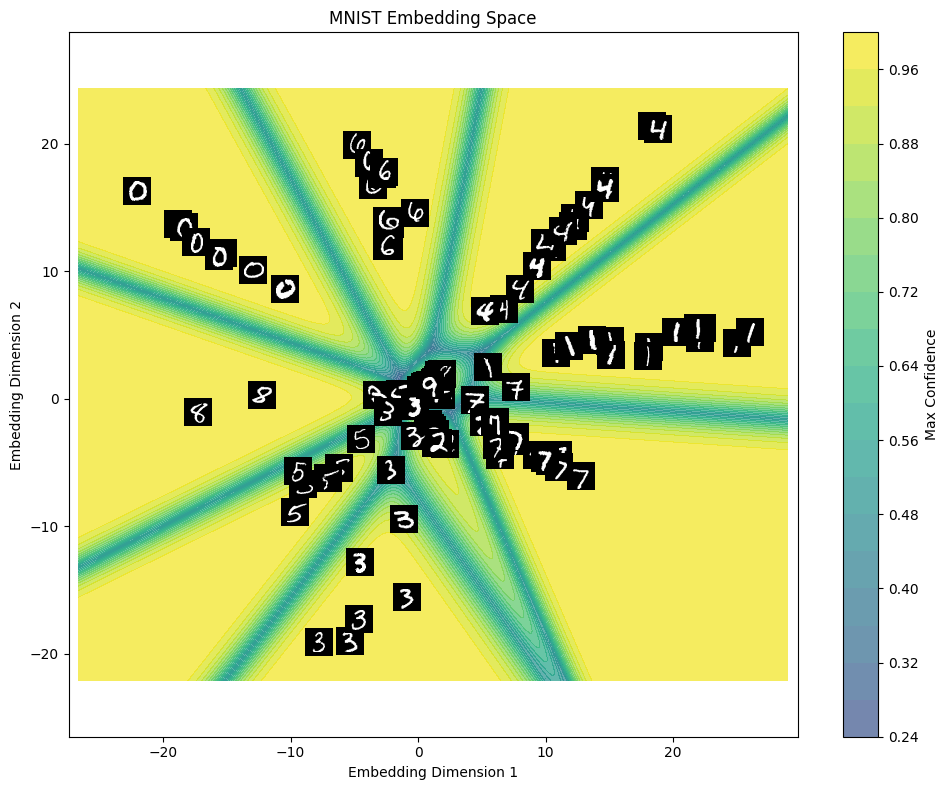


Results Summary:
MNIST Test Accuracy: 97.80%


In [17]:
# Visualize MNIST embeddings
# You DO NOT NEED to CHANGE anything.

print("\nVisualizing MNIST embeddings...")
try:
    visualize_embedding_space(model, mnist_test_loader, config, "MNIST Embedding Space")
    plt.show()
except Exception as e:
    print(f"Visualization error: {e}")

# Summary
print(f"\nResults Summary:")
print(f"MNIST Test Accuracy: {best_accuracy:.2f}%")

In [18]:
W = model.classifier.weight.detach().cpu()   
b = model.classifier.bias.detach().cpu()     
print("\nClassifier W (shape {}):\n".format(tuple(W.shape)), W)
print("\nClassifier b (shape {}):\n".format(tuple(b.shape)), b)


Classifier W (shape (10, 2)):
 tensor([[-1.6789,  1.4596],
        [ 2.1098,  0.3485],
        [ 0.4491, -1.6554],
        [-0.4303, -2.2761],
        [ 0.9728,  1.8243],
        [-1.5348, -1.4022],
        [-0.5104,  2.1061],
        [ 2.0191, -0.9794],
        [-2.2033, -0.0437],
        [ 0.8081,  0.6187]])

Classifier b (shape (10,)):
 tensor([-0.9944, -1.2587,  2.4261, -2.4263, -0.9879,  0.1610, -0.4652, -0.7882,
         0.3535,  3.9801])
